In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
mAP = []
R1 = []
Lambda = []

In [3]:
file = open('train_384x128_0.log','r')
textline = file.readline()
while textline != '':
    data = textline.split(':')
    if 'mAP' in textline:
        value = float(re.findall(r"\d*\.\d+", data[-1])[0])
        mAP.append(value)
    elif 'Rank-1 ' in textline:
        value = float(re.findall(r"\d*\.\d+", data[-1])[0])
        R1.append(value)
    elif 'Lambda' in textline:
        value = float(re.findall(r"\d*\.\d+", data[-1])[0])
        Lambda.append(value)
                
    textline = file.readline()
    
file.close()

In [4]:
import numpy as np
mAP = np.array(mAP)
R1 = np.array(R1)
Lambda = np.array(Lambda)

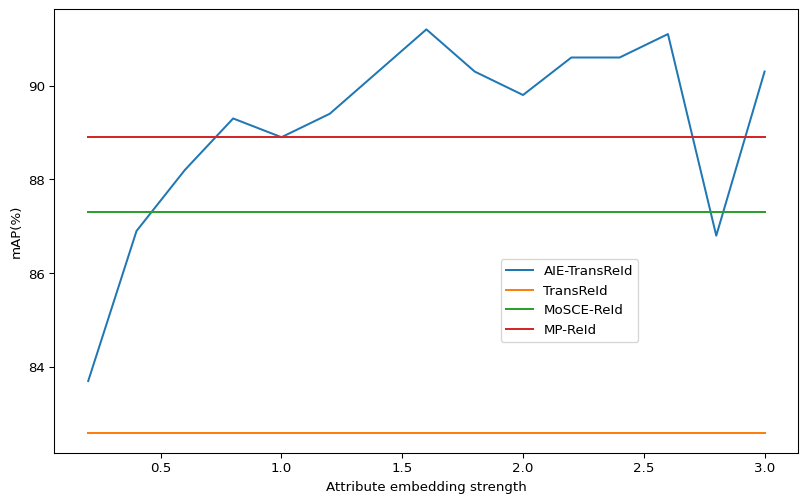

In [23]:
plt.figure(figsize=(10,6), dpi=96)
plt.plot(Lambda, mAP, label='AIE-TransReId')
plt.plot(Lambda[[0,-1]], [82.6,82.6], label='TransReId')
plt.plot(Lambda[[0,-1]], [87.3,87.3], label='MoSCE-ReId')
plt.plot(Lambda[[0,-1]], [88.9,88.9], label='MP-ReId')
plt.xlabel('Attribute embedding strength')
plt.ylabel('mAP(%)')
plt.legend(loc=[.6, .25])

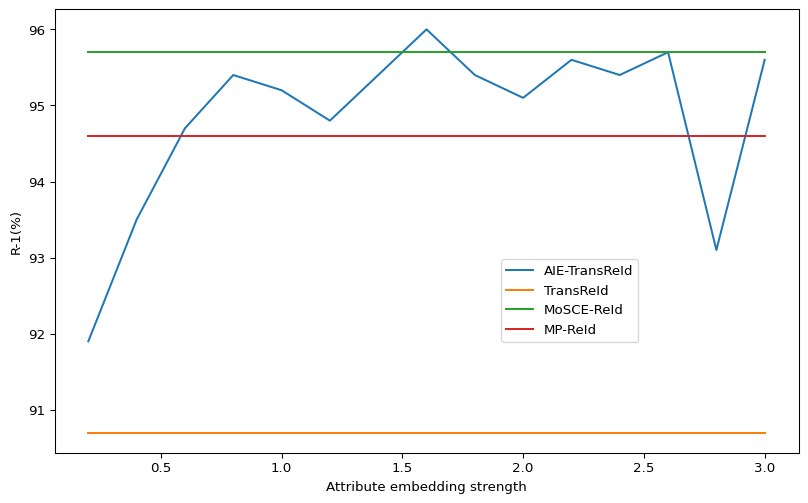

In [24]:
plt.figure(figsize=(10,6), dpi=96)
plt.plot(Lambda, R1, label='AIE-TransReId')
plt.plot(Lambda[[0,-1]], [90.7,90.7], label='TransReId')
plt.plot(Lambda[[0,-1]], [95.7,95.7], label='MoSCE-ReId')
plt.plot(Lambda[[0,-1]], [94.6,94.6], label='MP-ReId')
plt.xlabel('Attribute embedding strength')
plt.ylabel('R-1(%)')
plt.legend(loc=[.6, .25])